In [2]:
import numpy as np
import os
import seaborn as sns
import scipy.stats as stat
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import warnings
warnings.filterwarnings("ignore")
import acquire as acq
import prepare as prep
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
titanic_query = "select * from passengers"
directory = os.getcwd()

In [4]:
#prep
titanic_df = acq.get_titanic_data(titanic_query)
titanic_df['survived'] = titanic_df['survived'].astype(str) #should have dropped embark, and passenger_id so I didn't have to deal with it later
titanic_df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [5]:
#clean my data
titanic_df = prep.prep_titanic(titanic_df)

titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1


In [83]:
titanic_df = titanic_df.drop(['passenger_id', 'sex', 'embarked'], axis=1)
titanic_df.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1


In [84]:
#split my data
train, validate, test = prep.split_data(titanic_df, 'survived')

In [85]:
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,1,3,0,0,7.8958,1,1,0,0
380,1,1,0,0,227.5250,1,0,0,0
492,0,1,0,0,30.5000,1,1,0,1
55,1,1,0,0,35.5000,1,1,0,1
243,0,3,0,0,7.1250,1,1,0,1


Explore
ONLY USING TRAIN!

completed the following steps on my features and target variable

hypothesize
visualize
analyze
summarize
these steps arent written out here, however, i found that petal width and petal length identified species the most

Model
Before we put anything into our machine learning model, we will want to establish a baseline predication

In [86]:
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,1,3,0,0,7.8958,1,1,0,0
380,1,1,0,0,227.5250,1,0,0,0
492,0,1,0,0,30.5000,1,1,0,1
55,1,1,0,0,35.5000,1,1,0,1
243,0,3,0,0,7.1250,1,1,0,1


In [87]:
train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [88]:
#calculate baseline accuracy
baseline_accuracy = 329 / (329+205)
baseline_accuracy

0.6161048689138576

**split into features and target variable

need to do this on my train, validate, and test dataframe
will end up with the following variables:
X_train, X_validate, X_test: all the features we plan to put into our model
y_train, y_validate, y_test: the targete variable

In [89]:
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,1,3,0,0,7.8958,1,1,0,0
380,1,1,0,0,227.5250,1,0,0,0
492,0,1,0,0,30.5000,1,1,0,1
55,1,1,0,0,35.5000,1,1,0,1
243,0,3,0,0,7.1250,1,1,0,1


In [94]:
X_train = train.iloc[:, 1:12]
X_validate = validate.iloc[:, 1:12]
X_test = test.iloc[:, 1:12]

In [95]:
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [96]:
target = 'survived'

In [97]:
y_train = train[target]
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: object

In [98]:
y_validate = validate[target]
y_test = test[target]

In [100]:
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [101]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [102]:
rf.score(X_train, y_train)

0.9456928838951311

In [103]:
rf.score(X_validate, y_validate)

0.7584269662921348

In [104]:
rf.feature_importances_

array([0.09578463, 0.06800369, 0.05490895, 0.41222941, 0.02416066,
       0.29576282, 0.01446652, 0.03468331])

In [105]:
X_train.columns

Index(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'embarked_Q',
       'embarked_S'],
      dtype='object')

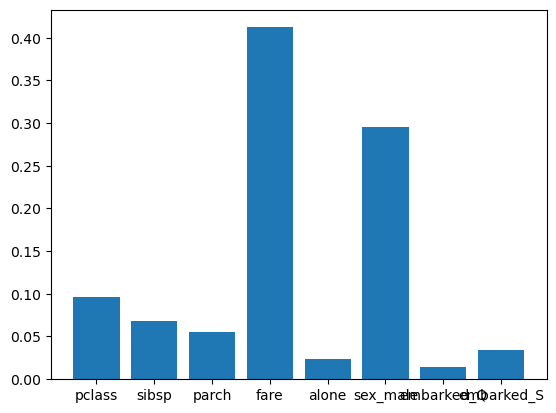

In [106]:
plt.bar(X_train.columns, rf.feature_importances_);

In [107]:
#set max depth & random_state
trees = RandomForestClassifier(random_state=123, min_samples_leaf=1 ,max_depth=10)
trees

RandomForestClassifier(max_depth=10, random_state=123)

In [108]:
trees.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [109]:
trees.score(X_train, y_train)

0.9438202247191011

In [110]:
trees.predict(X_train)[:5]

array(['0', '1', '0', '1', '0'], dtype=object)

In [111]:
trees.predict(X_train)[:5]

array(['0', '1', '0', '1', '0'], dtype=object)

In [112]:
y_pred = trees.predict(X_train)
y_pred[:5]

array(['0', '1', '0', '1', '0'], dtype=object)

In [113]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[324,   5],
       [ 25, 180]])

In [116]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       329
           1       0.97      0.88      0.92       205

    accuracy                           0.94       534
   macro avg       0.95      0.93      0.94       534
weighted avg       0.95      0.94      0.94       534



In [114]:
labels = sorted(y_train.unique())
labels

['0', '1']

In [115]:
#make pretty with df
pd.DataFrame(conf,
            index=[label + '_actual'for label in labels],
            columns=[label + '_predict'for label in labels])

,0_predict,1_predict
0_actual,324,5
1_actual,25,180


In [118]:
conf.ravel()

array([324,   5,  25, 180])

In [119]:
TN, FP, FN, TP = conf.ravel()
TN, FP, FN, TP

(324, 5, 25, 180)

In [120]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [121]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.9438202247191011

True Positive Rate/Sensitivity/Recall/Power: 0.8780487804878049
False Positive Rate/False Alarm Ratio/Fall-out: 0.015197568389057751
True Negative Rate/Specificity/Selectivity: 0.9848024316109423
False Negative Rate/Miss Rate: 0.12195121951219512

Precision/PPV: 0.972972972972973
F1 Score: 0.923076923076923

Support (0): 205
Support (1): 329


In [117]:
trees.score(X_validate, y_validate)

0.7584269662921348

In [123]:
for x in range(1, 11):
    
    tree = RandomForestClassifier(random_state=123, min_samples_leaf=x, max_depth=11-x)

    tree.fit(X_train, y_train)

    acc = tree.score(X_train, y_train)

    # print the accuracy score for the current parameters
    print(f'for min_samples_leaf={x} and max_depth={11-x}, the accuracy is {round(acc,2)}')

for min_samples_leaf=1 and max_depth=10, the accuracy is 0.94
for min_samples_leaf=2 and max_depth=9, the accuracy is 0.89
for min_samples_leaf=3 and max_depth=8, the accuracy is 0.87
for min_samples_leaf=4 and max_depth=7, the accuracy is 0.86
for min_samples_leaf=5 and max_depth=6, the accuracy is 0.84
for min_samples_leaf=6 and max_depth=5, the accuracy is 0.84
for min_samples_leaf=7 and max_depth=4, the accuracy is 0.83
for min_samples_leaf=8 and max_depth=3, the accuracy is 0.83
for min_samples_leaf=9 and max_depth=2, the accuracy is 0.79
for min_samples_leaf=10 and max_depth=1, the accuracy is 0.75


What are the differences in the evaluation metrics? The best metrics is the original min_samples_leaf with a max_depth of 10 which had an accuracy of 94%.

Which performs better on your in-sample data? Why?

In [125]:
tree.score(X_test, y_test)

0.770949720670391

In [ ]:
------------------telco_df-------------------

In [80]:
directory = os.getcwd()

In [158]:
telco_query = """
        select * from customers
        join contract_types using (contract_type_id)
        join internet_service_types using (internet_service_type_id)
        join payment_types using (payment_type_id)
        """

telco_df = acq.get_telco_data(telco_query)
telco_df = telco_df.drop("Unnamed: 0" ,axis=1)
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [159]:
#clean my data
telco_df = prep.prep_telco(telco_df)
telco_df = telco_df.drop(columns=['payment_type_id', 'senior_citizen', 'total_charges', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'internet_service_type_id', 'contract_type_id', 'customer_id', 'gender', 'tech_support', 'contract_type', 'internet_service_type', 'payment_type'])

telco_df.head()

,tenure,monthly_charges,churn,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,9,65.6,No,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,9,59.9,No,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,4,73.9,Yes,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,13,98.0,Yes,0,0,0,0,0,1,0,...,1,0,1,0,0,1,0,0,1,0
4,3,83.9,Yes,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [160]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   monthly_charges                        7043 non-null   float64
 2   churn                                  7043 non-null   object 
 3   multiple_lines_No phone service        7043 non-null   uint8  
 4   multiple_lines_Yes                     7043 non-null   uint8  
 5   online_security_No internet service    7043 non-null   uint8  
 6   online_security_Yes                    7043 non-null   uint8  
 7   online_backup_No internet service      7043 non-null   uint8  
 8   online_backup_Yes                      7043 non-null   uint8  
 9   device_protection_No internet service  7043 non-null   uint8  
 10  device_protection_Yes                  7043 non-null   uint8  
 11  tech

In [161]:
#split my data
train, validate, test = prep.split_data(telco_df, 'churn')

In [162]:
train.head()

,tenure,monthly_charges,churn,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,26,39.95,No,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2479,47,26.90,No,0,1,1,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
5889,1,50.45,Yes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6087,69,60.05,No,1,0,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,0
785,51,87.55,No,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,1,0,0


Explore
ONLY USING TRAIN!

completed the following steps on my features and target variable

hypothesize
visualize
analyze
summarize
these steps arent written out here, however, i found that petal width and petal length identified species the most

Model
Before we put anything into our machine learning model, we will want to establish a baseline predication

In [163]:
train.head()

,tenure,monthly_charges,churn,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,26,39.95,No,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2479,47,26.90,No,0,1,1,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
5889,1,50.45,Yes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6087,69,60.05,No,1,0,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,0
785,51,87.55,No,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,1,0,0


In [164]:
train.churn.value_counts()

No     3104
Yes    1121
Name: churn, dtype: int64

In [165]:
#calculate baseline accuracy
baseline_accuracy = 3104 / (3104+1121)
baseline_accuracy

0.7346745562130178

**split into features and target variable

need to do this on my train, validate, and test dataframe
will end up with the following variables:
X_train, X_validate, X_test: all the features we plan to put into our model
y_train, y_validate, y_test: the targete variable

In [166]:
train.head()

,tenure,monthly_charges,churn,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,26,39.95,No,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2479,47,26.90,No,0,1,1,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
5889,1,50.45,Yes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6087,69,60.05,No,1,0,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,0
785,51,87.55,No,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,1,0,0


In [169]:
X_train = train.iloc[:, [i for i in range(0, 24) if i != 2]]
X_validate = validate.iloc[:, [i for i in range(0, 24) if i != 2]]
X_test = test.iloc[:, [i for i in range(0, 24) if i != 2]]

In [170]:
X_train.head()

,tenure,monthly_charges,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,26,39.95,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2479,47,26.90,0,1,1,0,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
5889,1,50.45,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6087,69,60.05,1,0,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
785,51,87.55,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,1,0,0


In [171]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 4225 non-null   int64  
 1   monthly_charges                        4225 non-null   float64
 2   multiple_lines_No phone service        4225 non-null   uint8  
 3   multiple_lines_Yes                     4225 non-null   uint8  
 4   online_security_No internet service    4225 non-null   uint8  
 5   online_security_Yes                    4225 non-null   uint8  
 6   online_backup_No internet service      4225 non-null   uint8  
 7   online_backup_Yes                      4225 non-null   uint8  
 8   device_protection_No internet service  4225 non-null   uint8  
 9   device_protection_Yes                  4225 non-null   uint8  
 10  tech_support_No internet service       4225 non-null   uint8  
 11  t

In [172]:
target = 'churn'

In [173]:
y_train = train[target]
y_train.head()

5911     No
2479     No
5889    Yes
6087     No
785      No
Name: churn, dtype: object

In [174]:
y_validate = validate[target]
y_test = test[target]

In [175]:
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [176]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [177]:
rf.score(X_train, y_train)

0.9938461538461538

In [178]:
rf.score(X_validate, y_validate)

0.7721788502484032

In [179]:
rf.feature_importances_

array([0.29751795, 0.30739174, 0.00719546, 0.02466627, 0.00623416,
       0.03031703, 0.0014259 , 0.02734661, 0.00267833, 0.02294665,
       0.00425375, 0.02963169, 0.00672204, 0.02024886, 0.0049657 ,
       0.02037319, 0.03271048, 0.0326814 , 0.04144514, 0.00618611,
       0.01552656, 0.04459644, 0.01293854])

In [180]:
X_train.columns

Index(['tenure', 'monthly_charges', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check'],
      dtype='object')

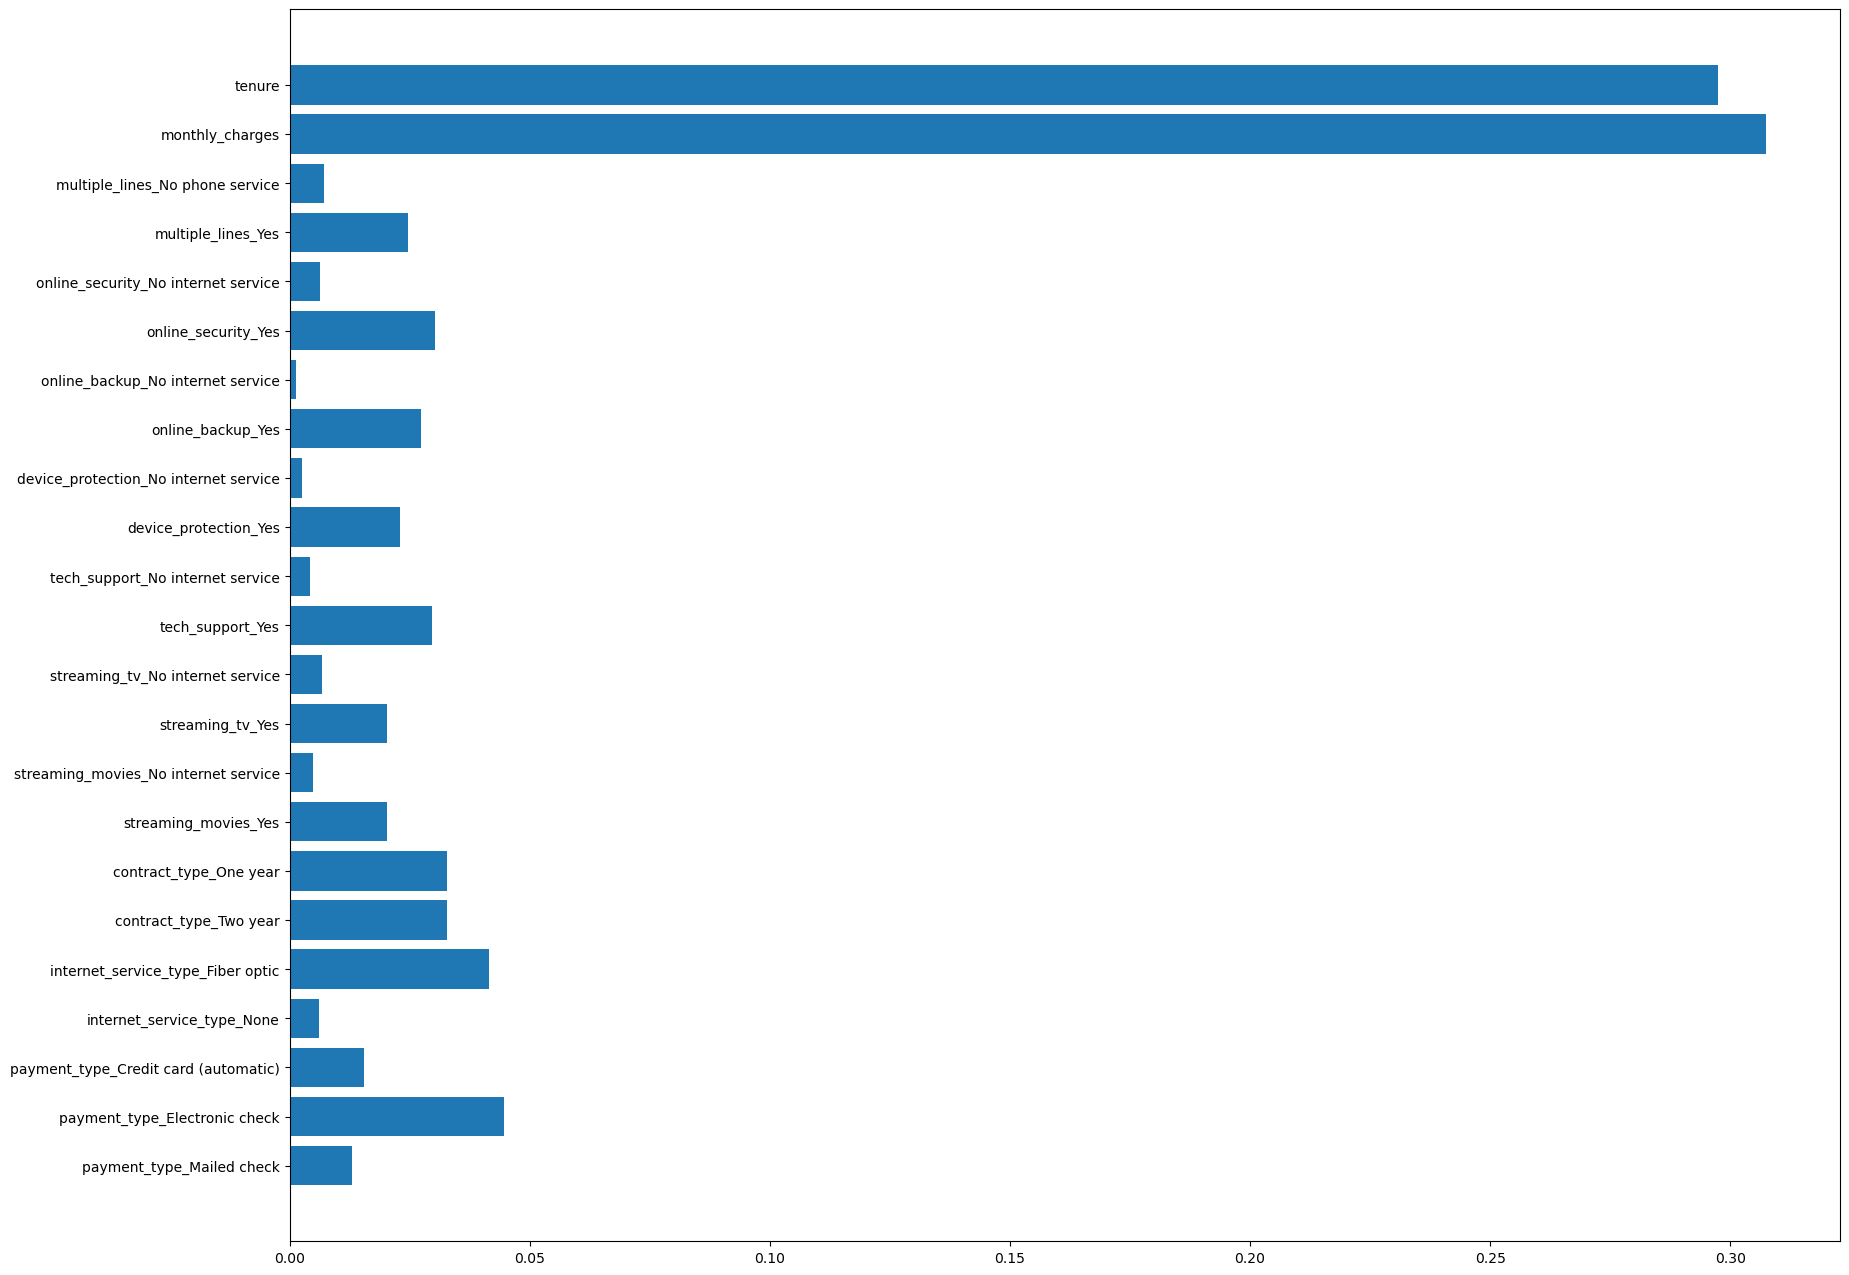

In [185]:
plt.figure(figsize=(20,16))
plt.barh(X_train.columns, rf.feature_importances_)
plt.gca().invert_yaxis()
plt.show()

In [186]:
#set max depth & random_state
trees = RandomForestClassifier(random_state=123, min_samples_leaf=1 ,max_depth=10)
trees

RandomForestClassifier(max_depth=10, random_state=123)

In [187]:
trees.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [188]:
trees.score(X_train, y_train)

0.8634319526627219

In [189]:
trees.predict(X_train)[:5]

array(['No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [190]:
trees.predict(X_train)[:5]

array(['No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [191]:
y_pred = trees.predict(X_train)
y_pred[:5]

array(['No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [192]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[2915,  189],
       [ 388,  733]])

In [193]:
labels = sorted(y_train.unique())
labels

['No', 'Yes']

In [194]:
#make pretty with df
pd.DataFrame(conf,
            index=[label + '_actual'for label in labels],
            columns=[label + '_predict'for label in labels])

,No_predict,Yes_predict
No_actual,2915,189
Yes_actual,388,733


In [195]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.88      0.94      0.91      3104
         Yes       0.80      0.65      0.72      1121

    accuracy                           0.86      4225
   macro avg       0.84      0.80      0.81      4225
weighted avg       0.86      0.86      0.86      4225



In [196]:
conf.ravel()

array([2915,  189,  388,  733])

In [197]:
TN, FP, FN, TP = conf.ravel()
TN, FP, FN, TP

(2915, 189, 388, 733)

In [198]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [199]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.8634319526627219

True Positive Rate/Sensitivity/Recall/Power: 0.6538804638715433
False Positive Rate/False Alarm Ratio/Fall-out: 0.06088917525773196
True Negative Rate/Specificity/Selectivity: 0.939110824742268
False Negative Rate/Miss Rate: 0.34611953612845675

Precision/PPV: 0.7950108459869848
F1 Score: 0.7175721977484092

Support (0): 1121
Support (1): 3104


In [200]:
trees.score(X_validate, y_validate)

0.7970191625266146

In [201]:
for x in range(1, 11):
    
    tree = RandomForestClassifier(random_state=123, min_samples_leaf=x, max_depth=11-x)

    tree.fit(X_train, y_train)

    acc = tree.score(X_train, y_train)

    # print the accuracy score for the current parameters
    print(f'for min_samples_leaf={x} and max_depth={11-x}, the accuracy is {round(acc,2)}')

for min_samples_leaf=1 and max_depth=10, the accuracy is 0.86
for min_samples_leaf=2 and max_depth=9, the accuracy is 0.83
for min_samples_leaf=3 and max_depth=8, the accuracy is 0.82
for min_samples_leaf=4 and max_depth=7, the accuracy is 0.81
for min_samples_leaf=5 and max_depth=6, the accuracy is 0.8
for min_samples_leaf=6 and max_depth=5, the accuracy is 0.79
for min_samples_leaf=7 and max_depth=4, the accuracy is 0.79
for min_samples_leaf=8 and max_depth=3, the accuracy is 0.77
for min_samples_leaf=9 and max_depth=2, the accuracy is 0.73
for min_samples_leaf=10 and max_depth=1, the accuracy is 0.73


What are the differences in the evaluation metrics? The best metrics is the original min_samples_leaf with a max_depth of 10 which had an accuracy of 86%.

Which performs better on your in-sample data? Why?

In [202]:
tree.score(X_test, y_test)

0.7345635202271115